In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

#for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#cross validation
from sklearn.model_selection import RandomizedSearchCV

#ML models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#metrics for checking the performance of models
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [79]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [80]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


### Checking Data imbalancing

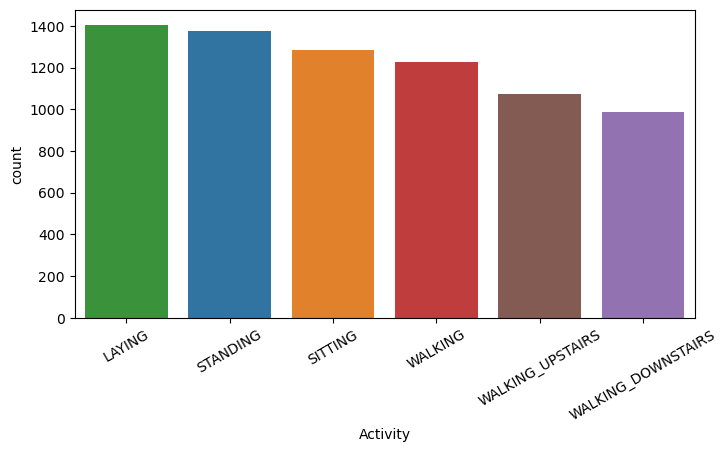

In [81]:
plt.figure(figsize=(8,4))
sns.countplot(x = train.Activity, hue = train.Activity, order = train.Activity.value_counts().index)
plt.xticks(rotation=30)
plt.show()

### EDA

In [82]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [83]:
Counter([col.split('-')[0].split('(')[0] for col in train.columns])

Counter({'fBodyAcc': 79,
         'fBodyAccJerk': 79,
         'fBodyGyro': 79,
         'tBodyAcc': 40,
         'tGravityAcc': 40,
         'tBodyAccJerk': 40,
         'tBodyGyro': 40,
         'tBodyGyroJerk': 40,
         'tBodyAccMag': 13,
         'tGravityAccMag': 13,
         'tBodyAccJerkMag': 13,
         'tBodyGyroMag': 13,
         'tBodyGyroJerkMag': 13,
         'fBodyAccMag': 13,
         'fBodyBodyAccJerkMag': 13,
         'fBodyBodyGyroMag': 13,
         'fBodyBodyGyroJerkMag': 13,
         'angle': 7,
         'subject': 1,
         'Activity': 1})

In [84]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]), orient = 'index').rename(columns={0:'Count'}).sort_values('Count', ascending=False)

,Count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


Text(0.4, 10, 'Dynamic Activity')

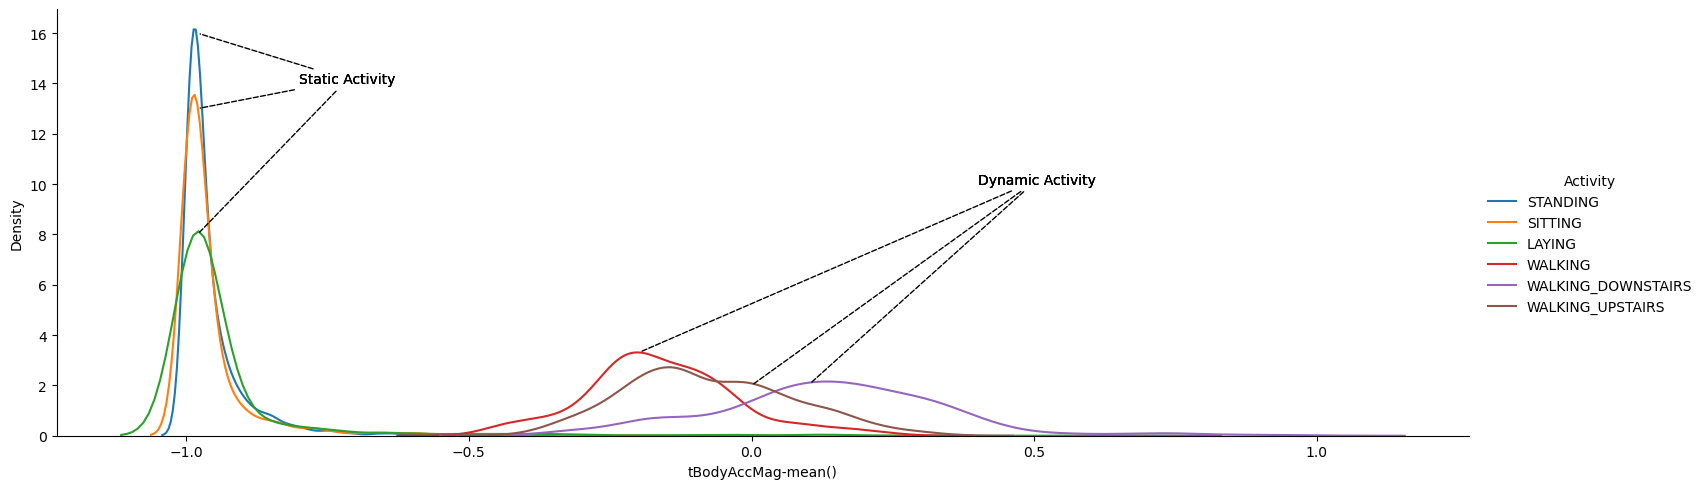

In [85]:
facetgrid = sns.FacetGrid(train, hue='Activity', height=5, aspect=3)
facetgrid.map(sns.distplot, 'tBodyAccMag-mean()', hist=False).add_legend()

plt.annotate('Static Activity',xy=(-.98,8), xytext=(-.8,14),arrowprops={'arrowstyle':'-', 'ls':'dashed'})
plt.annotate('Static Activity',xy=(-.98,13), xytext=(-.8,14),arrowprops={'arrowstyle':'-', 'ls':'dashed'})
plt.annotate('Static Activity',xy=(-.98,16), xytext=(-0.8,14),arrowprops={'arrowstyle':'-', 'ls':'dashed'})
plt.annotate('Dynamic Activity',xy=(-.2,3.3), xytext=(.4,10),arrowprops={'arrowstyle':'-', 'ls':'dashed'})
plt.annotate('Dynamic Activity',xy=(0,2), xytext=(.4,10),arrowprops={'arrowstyle':'-', 'ls':'dashed'})
plt.annotate('Dynamic Activity',xy=(.1,2), xytext=(.4,10),arrowprops={'arrowstyle':'-', 'ls':'dashed'})

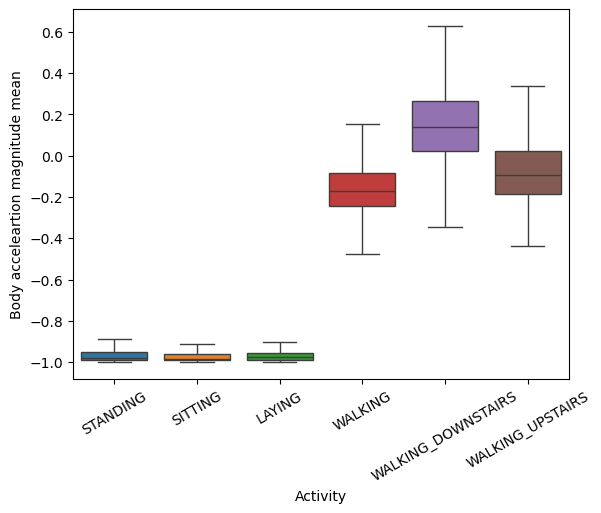

In [86]:
sns.boxplot(x='Activity', y='tBodyAccMag-mean()',hue='Activity', data=train, showfliers=False)
plt.xticks(rotation=30)
plt.ylabel('Body acceleartion magnitude mean')
plt.show()

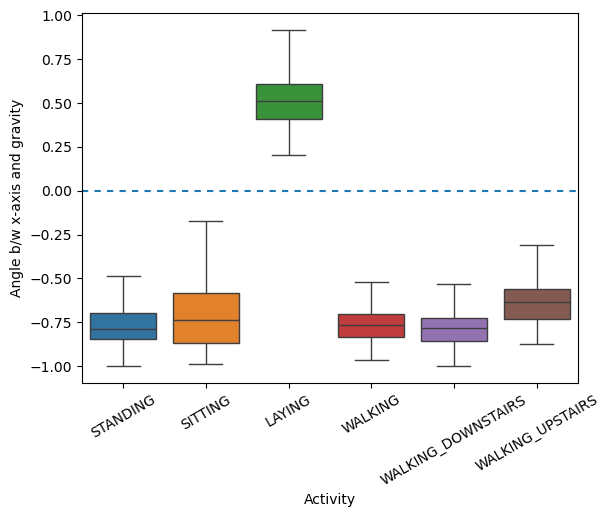

In [87]:
sns.boxplot(x='Activity', y='angle(X,gravityMean)',hue='Activity', data=train, showfliers=False)
plt.xticks(rotation=30)
plt.ylabel('Angle b/w x-axis and gravity')
plt.axhline(y=0, dashes=(3,3))
plt.show()

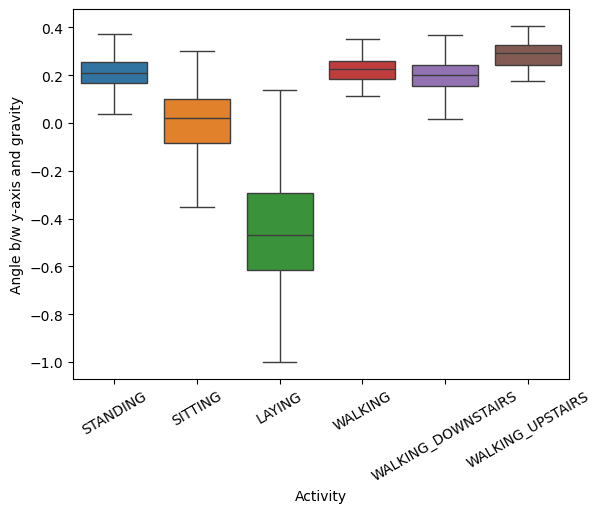

In [88]:
sns.boxplot(x='Activity', y='angle(Y,gravityMean)',hue='Activity', data=train, showfliers=False)
plt.xticks(rotation=30)
plt.ylabel('Angle b/w y-axis and gravity')
plt.show()

### PCA

In [89]:
x_for_pca = train.drop(['subject','Activity'], axis=1)
pca = PCA(n_components=2).fit_transform(x_for_pca)

In [90]:
pca

array([[-5.5202803 , -0.29027729],
       [-5.53534954, -0.08253018],
       [-5.47498801,  0.28738708],
       ...,
       [ 5.85750527, -3.08184339],
       [ 5.42109482, -3.42643009],
       [ 5.49797027, -2.78992871]])

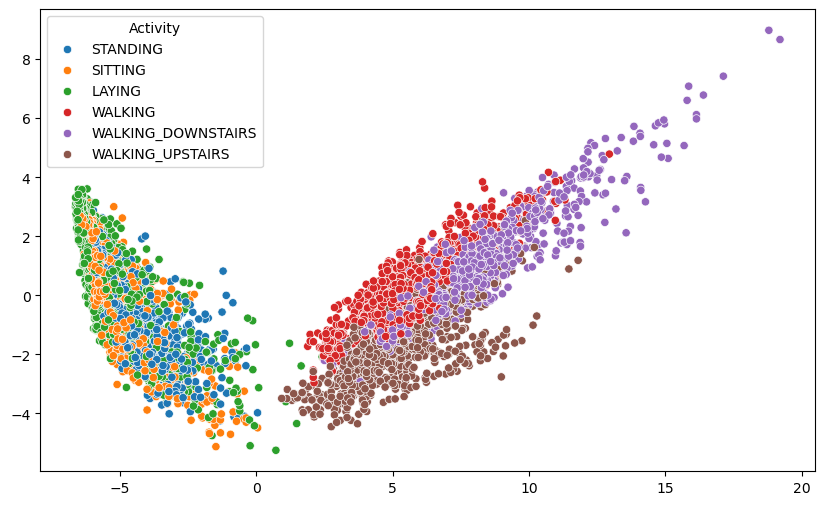

In [91]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=pca[:,0], y=pca[:,1], hue=train['Activity'])
plt.show()

### TSNE

In [92]:
x_for_tsne = train.drop(['subject','Activity'], axis=1)
tsne = TSNE(n_components=2, random_state=0, n_iter=1000).fit_transform(x_for_tsne)

In [93]:
tsne

array([[ -6.9932804, -63.188377 ],
       [-25.07103  , -17.728373 ],
       [-27.199108 , -20.449244 ],
       ...,
       [ 23.136957 , -60.145756 ],
       [ 23.117773 , -59.890156 ],
       [ 23.605974 , -59.11817  ]], dtype=float32)

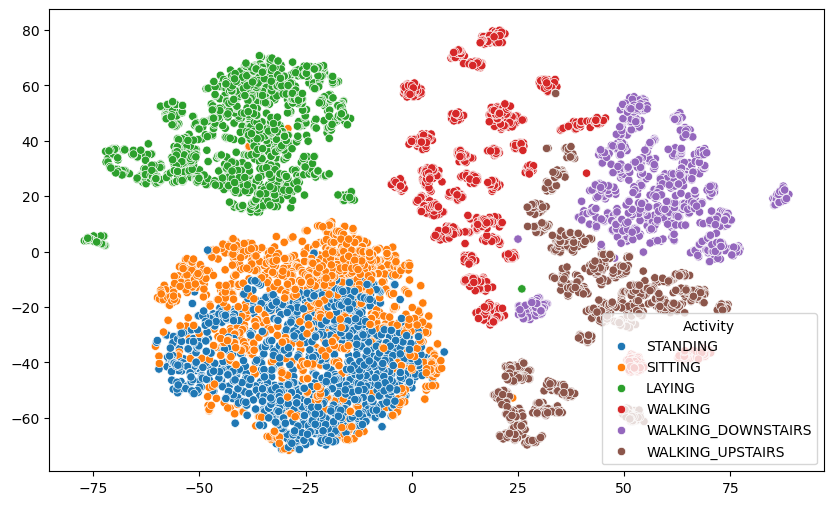

In [94]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=tsne[:,0], y=tsne[:,1], hue=train['Activity'])
plt.show()

### Data preparation for ML models

In [95]:
xtrain = train.drop(['subject', 'Activity'],axis=1)
xtest = test.drop(['subject', 'Activity'],axis=1)
ytrain = train.Activity
ytest = test.Activity

In [96]:
print(xtrain.shape)
print(xtest.shape)

(7352, 561)
(999, 561)


### Logistic regression

In [97]:
parameters = {'max_iter': [100,200,500]}
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions=parameters, cv=5, random_state=42)
lr_classifier_rs.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'max_iter': [100, 200, 500]},
                   random_state=42)

In [98]:
pred = lr_classifier_rs.predict(xtest)

In [99]:
acc = accuracy_score(ytest, pred)

In [100]:
acc

0.955955955955956

In [101]:
cm=confusion_matrix(ytest, pred)
labels = np.unique(pred)

In [102]:
cm.shape

(6, 6)

In [103]:
def plot_cm(cm, labels):
    fig,ax=plt.subplots(figsize=(8,6))
    im=ax.imshow(cm,interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im,ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=labels, yticklabels=labels,
           ylabel='True label',
           xlabel='Predicted label')
    plt.xticks(rotation=90)
    thresh=cm.max()/2
    for i in range(cm.shape[1]):
        for j in range(cm.shape[0]):
            ax.text(j,i,int(cm[i,j]),
                   ha='center',va='center',color='white'
                   if cm[i,j]>thresh else 'Black')
    fig.tight_layout()

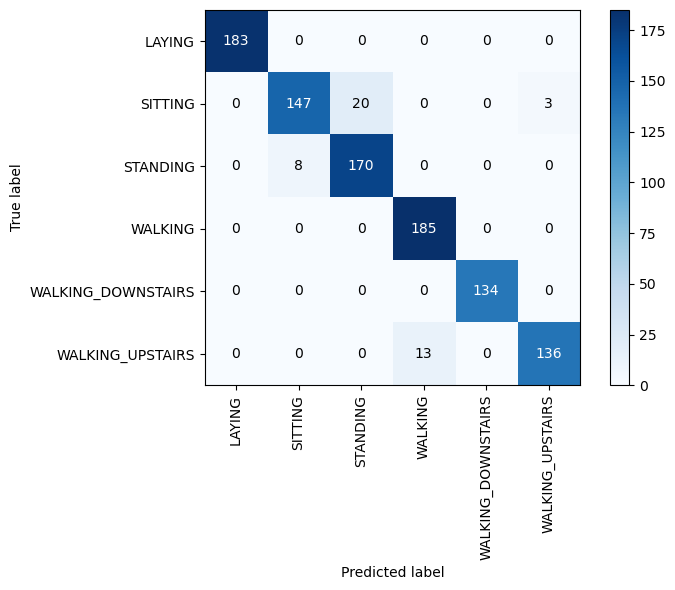

In [104]:
plot_cm(cm,labels)

### Best random search attributes

In [105]:
def best_rs_results(model):
    print('best_estimator =', model.best_estimator_)
    print('best set of parameters =', model.best_params_)

In [106]:
best_rs_results(lr_classifier_rs)

best_estimator = LogisticRegression(max_iter=200)
best set of parameters = {'max_iter': 200}


### SVM

In [107]:
parameters = {'kernel':['linear','sigmoid','rbf','poly'],
             'C': [100,50]}
svm = SVC()
svm_rs = RandomizedSearchCV(svm, param_distributions=parameters, cv=3, random_state=42)
svm_rs.fit(xtrain, ytrain)

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [100, 50],
                                        'kernel': ['linear', 'sigmoid', 'rbf',
                                                   'poly']},
                   random_state=42)

In [108]:
pred_svm = svm_rs.predict(xtest)

In [109]:
acc_svm = accuracy_score(ytest, pred_svm)

In [110]:
acc_svm

0.965965965965966

In [111]:
best_rs_results(svm_rs)

best_estimator = SVC(C=50)
best set of parameters = {'kernel': 'rbf', 'C': 50}


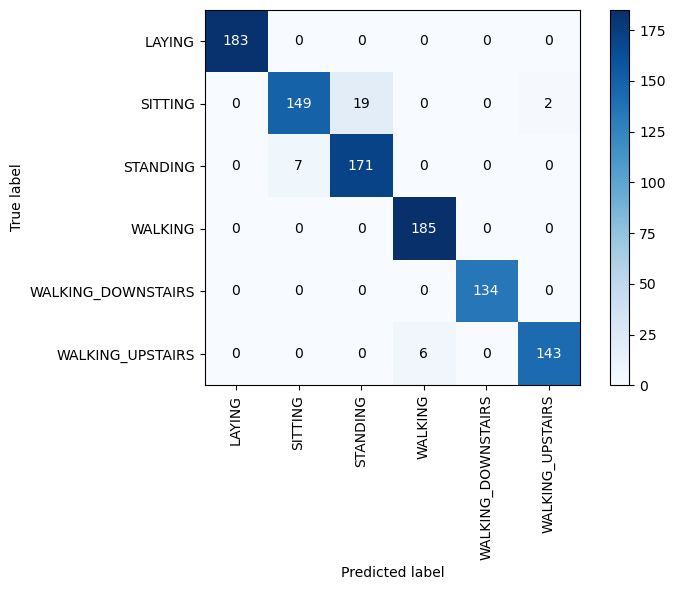

In [112]:
plot_cm(confusion_matrix(ytest, pred_svm), np.unique(pred_svm))

### Decision Tree

In [113]:
parameters = {'max_depth':np.arange(2,20,2)}
dtc = DecisionTreeClassifier()
dtc_rs = RandomizedSearchCV(dtc, param_distributions=parameters,cv=3, random_state=42)
dtc_rs.fit(xtrain, ytrain)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])},
                   random_state=42)

Accuracy = 0.8358358358358359
best_estimator = DecisionTreeClassifier(max_depth=6)
best set of parameters = {'max_depth': 6}
None


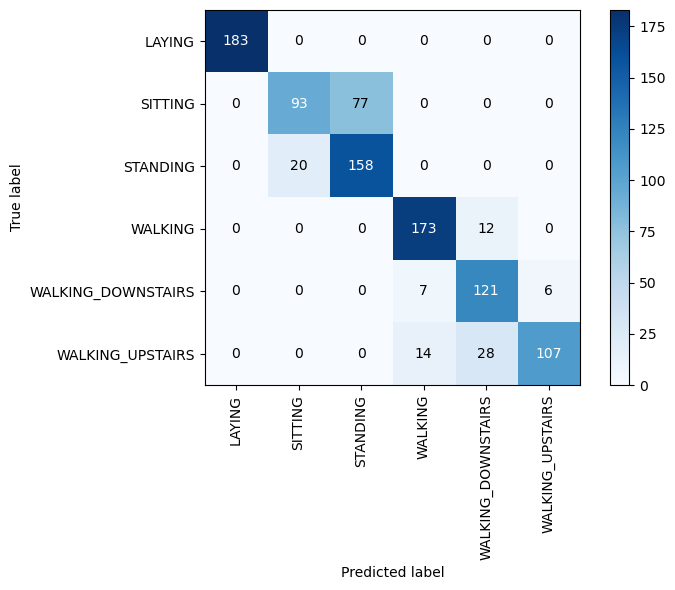

In [114]:
pred_dtc = dtc_rs.predict(xtest)
acc_dtc = accuracy_score(ytest, pred_dtc)
print('Accuracy =',acc_dtc)
print(best_rs_results(dtc_rs))
plot_cm(confusion_matrix(ytest, pred_dtc), np.unique(pred_dtc))

### Random forest

In [115]:
parameters = {'max_depth':np.arange(2,20,2),
             'n_estimators':np.arange(20,101,10)}
rfc = RandomForestClassifier()
rfc_rs = RandomizedSearchCV(rfc, param_distributions=parameters, random_state=42)
rfc_rs.fit(xtrain, ytrain)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=42)

Accuracy = 0.9039039039039038
best_estimator = RandomForestClassifier(max_depth=8, n_estimators=60)
best set of parameters = {'n_estimators': 60, 'max_depth': 8}
None


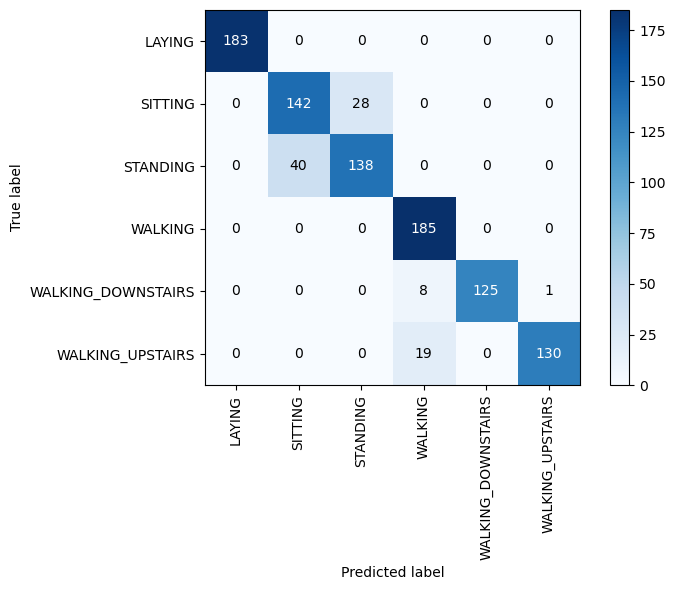

In [116]:
pred_rfc = rfc_rs.predict(xtest)
acc_rfc = accuracy_score(ytest, pred_rfc)
print('Accuracy =',acc_rfc)
print(best_rs_results(rfc_rs))
plot_cm(confusion_matrix(ytest, pred_rfc), np.unique(pred_rfc))